In [1]:
#importing the required libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# seting the kernal display options 

In [4]:
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [5]:
# loading the csv data file from the local disk 

In [6]:
pgn =pd.read_csv("C:/Users/Thamizhiniyan/Downloads/penguine/penguin_ds.csv")

In [7]:
pgn.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN


In [8]:
pgn.tail(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN
343,PAL0910,124,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A2,Yes,11/22/09,49.9,16.1,213.0,5400.0,MALE,8.36390,-26.15531,NaN


In [9]:
#checking the shape of the dataset

In [10]:
pgn.shape  # 344 rows and 17 columns

(344, 17)

In [11]:
pgn.size #total  no of data obsevations

5848

In [12]:
pgn.dtypes # looking for the data types of the each columns
           # date time format is in object

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object

In [13]:
#checking th distinct samples in each column

In [14]:
pgn.nunique()

studyName                3
Sample Number          152
Species                  3
Region                   1
Island                   3
Stage                    1
Individual ID          190
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Body Mass (g)           94
Sex                      3
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
Comments                 7
dtype: int64

#### > figure out the dataset in a brief view and understanding the datas in it

In [15]:
pgn["Clutch Completion"].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
pgn["Comments"].unique()

array(['Not enough blood for isotopes.', nan, 'Adult not sampled.',
       'Nest never observed with full clutch.',
       'No blood sample obtained.',
       'No blood sample obtained for sexing.',
       'Nest never observed with full clutch. Not enough blood for isotopes.',
       'Sexing primers did not amplify. Not enough blood for isotopes.'],
      dtype=object)

In [17]:
pgn["Sample Number"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152], dtype=int64)

In [18]:
pgn["Island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64

In [19]:
pgn["Individual ID"].nunique()

190

In [20]:
pgn["Individual ID"].duplicated().sum()

154

In [21]:
190+154 == pgn.shape[0]

True

In [22]:
# looking the columns names for the extraction process
pgn.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'], dtype='object')

In [23]:
"""extracting the column that hold survey variables
   which is not important for the species identification """
surveyid = pgn.loc[:,['studyName','Sample Number','Individual ID',
                      'Clutch Completion']]

In [24]:
surveyid.head(2)

,studyName,Sample Number,Individual ID,Clutch Completion
0,PAL0708,1,N1A1,Yes
1,PAL0708,2,N1A2,Yes


In [25]:
'''Extracting out the location and climate of the species'''

location = pgn.loc[:,["Region","Island","Delta 15 N (o/oo)",
                      "Delta 13 C (o/oo)","Species"]]

In [26]:
location.head(2)

,Region,Island,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Anvers,Torgersen,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
1,Anvers,Torgersen,8.94956,-24.69454,Adelie Penguin (Pygoscelis adeliae)


> Extracting out the required dataset to move further

In [27]:

pgn_ext = pgn.loc[:,["Species","Island","Date Egg",
                     "Culmen Length (mm)","Culmen Depth (mm)",
                     "Flipper Length (mm)","Body Mass (g)",
                     "Sex","Stage"]]

In [28]:
pgn_ext.head(2)

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Stage
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/11/07,39.1,18.7,181.0,3750.0,MALE,"Adult, 1 Egg Stage"
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,"Adult, 1 Egg Stage"


In [29]:
pgn_ext.dtypes

Species                 object
Island                  object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Stage                   object
dtype: object

In [30]:
#converting the data type of the date time column
pgn_ext["Date Egg"] = pgn_ext["Date Egg"].astype('datetime64[ns]')

In [31]:
pgn_ext.dtypes

Species                        object
Island                         object
Date Egg               datetime64[ns]
Culmen Length (mm)            float64
Culmen Depth (mm)             float64
Flipper Length (mm)           float64
Body Mass (g)                 float64
Sex                            object
Stage                          object
dtype: object

In [32]:
# checking for the duplicates in the columns
pgn_ext.duplicated().value_counts()

False    344
dtype: int64

In [33]:
# looking out for the Null/NAn/None values in the dataset
pgn_ext.isnull().sum()

Species                 0
Island                  0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Stage                   0
dtype: int64

<AxesSubplot: >

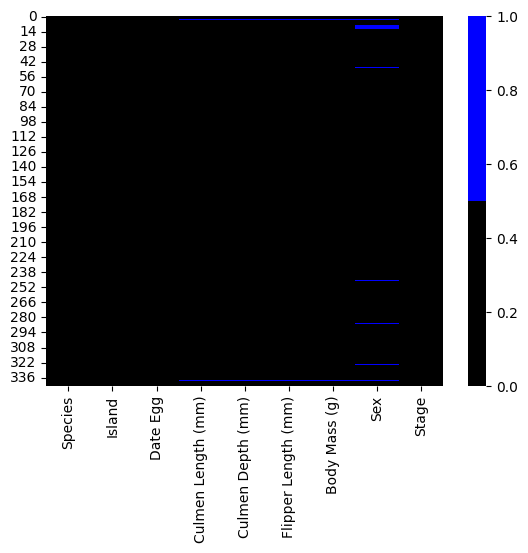

In [34]:
import seaborn as sns
cols = pgn_ext.columns 
colours = ['k', 'b'] # specify the colours - blue is missing. black is not missing.
sns.heatmap(pgn_ext[cols].isnull(),
            cmap=sns.color_palette(colours))

In [35]:
pgn_ext.shape

(344, 9)

#### taking a look at the Sex nan columns

In [36]:
age_null = pgn_ext.loc[pgn_ext["Sex"].isnull(),:]

In [37]:
#droping the rows that have all rows and all column Nan values
pgn_ext.dropna(how="all",inplace =True)

In [38]:
pgn_ext.shape

(344, 9)

In [39]:
age_null 

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Stage
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007-11-16,NaN,NaN,NaN,NaN,NaN,"Adult, 1 Egg Stage"
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007-11-09,34.1,18.1,193.0,3475.0,NaN,"Adult, 1 Egg Stage"
9,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007-11-09,42.0,20.2,190.0,4250.0,NaN,"Adult, 1 Egg Stage"
10,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007-11-09,37.8,17.1,186.0,3300.0,NaN,"Adult, 1 Egg Stage"
11,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007-11-09,37.8,17.3,180.0,3700.0,NaN,"Adult, 1 Egg Stage"
47,Adelie Penguin (Pygoscelis adeliae),Dream,2007-11-13,37.5,18.9,179.0,2975.0,NaN,"Adult, 1 Egg Stage"
246,Gentoo penguin (Pygoscelis papua),Biscoe,2007-11-29,44.5,14.3,216.0,4100.0,NaN,"Adult, 1 Egg Stage"
286,Gentoo penguin (Pygoscelis papua),Biscoe,2008-11-09,46.2,14.4,214.0,4650.0,NaN,"Adult, 1 Egg Stage"
324,Gentoo penguin (Pygoscelis papua),Biscoe,2009-12-01,47.3,13.8,216.0,4725.0,NaN,"Adult, 1 Egg Stage"
339,Gentoo penguin (Pygoscelis papua),Biscoe,2009-12-01,NaN,NaN,NaN,NaN,NaN,"Adult, 1 Egg Stage"


In [40]:
pgn_ext.shape

(344, 9)

In [41]:
pgn_ext.dropna(subset = "Sex",how = "any",axis = 0,inplace =True)

In [42]:
# change in Shape after droping out the rows of Sex Column that contains Null
pgn_ext.shape

(334, 9)

In [43]:
# relook to check for null
pgn_ext.isnull().sum()

Species                0
Island                 0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Stage                  0
dtype: int64

### The stage and Date Eggs seems less important for ML processing so droping out the columns

In [44]:
pgn_ext.drop("Stage",axis=1,inplace=True)

In [45]:
pgn_ext.drop("Date Egg",axis=1,inplace=True)

In [46]:
pgn_ext.head(2)

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [47]:
### encoding the columns required

In [48]:
png_ext = pd.get_dummies(pgn_ext,columns=["Sex","Island"],drop_first = True)

In [49]:
png_ext

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex_FEMALE,Sex_MALE,Island_Dream,Island_Torgersen
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0,0,1,0,1
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0,1,0,0,1
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0,1,0,0,1
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0,1,0,0,1
5,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,190.0,3650.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),47.2,13.7,214.0,4925.0,1,0,0,0
340,Gentoo penguin (Pygoscelis papua),46.8,14.3,215.0,4850.0,1,0,0,0
341,Gentoo penguin (Pygoscelis papua),50.4,15.7,222.0,5750.0,0,1,0,0
342,Gentoo penguin (Pygoscelis papua),45.2,14.8,212.0,5200.0,1,0,0,0


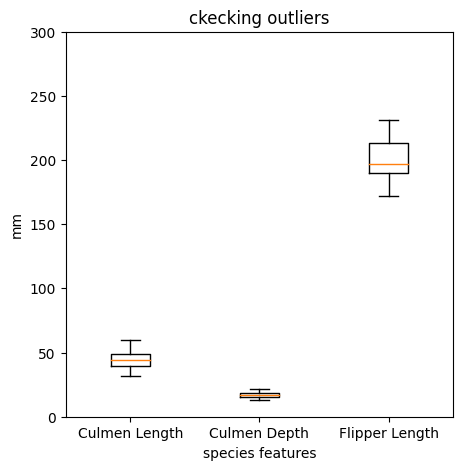

In [50]:
# checking for outliers
column = pgn_ext.loc[:,["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)"]]
fig,ax=plt.subplots(1,1)
fig.set_size_inches(5, 5)
ax.boxplot(column)
ax.set_xticklabels(["Culmen Length","Culmen Depth"
                     ,"Flipper Length"])
ax.set_ylim(0,300)
ax.set_xlabel('species features')
ax.set_ylabel('mm')
ax.set_title('ckecking outliers')
plt.show()